In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [8]:
x.shape

(1000, 2)

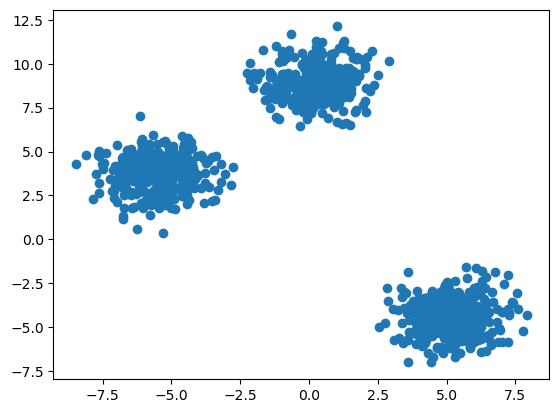

In [13]:
plt.scatter(x[:,0],x[:,1])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
from sklearn.cluster import KMeans

In [18]:
#elbow mwthod to select the K value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


In [19]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.508033527467,
 992.5462587554139,
 856.3745411997465,
 762.477189272669,
 668.9513256793934,
 577.609808176423,
 533.3121479285992]

Text(0, 0.5, 'Wcss')

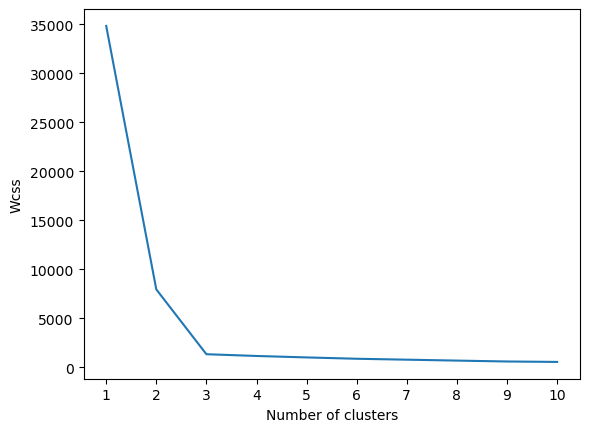

In [20]:
#plot elob curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')

In [21]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [23]:
y_labels=kmeans.fit_predict(X_train)

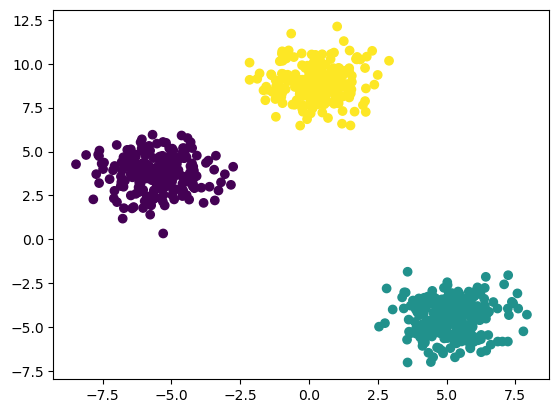

In [24]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [25]:
y_labels=kmeans.fit_predict(X_test)

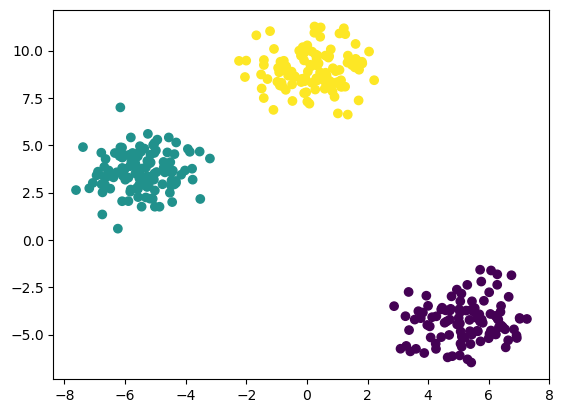

In [26]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_labels)

In [27]:
#knee locator 
!pip install kneed

In [28]:
from kneed import KneeLocator

In [30]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [31]:
##performance metrics
#using silhoutte score
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [33]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797673,
 0.6357733426488265,
 0.4907093255057165,
 0.3369432845195746,
 0.33741916456785503,
 0.34040094320035313,
 0.3393289278336162,
 0.34080327841900476]

Text(0, 0.5, 'silhouette coefficient')

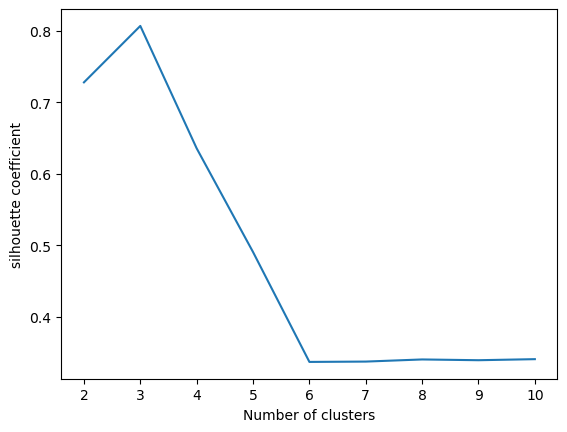

In [35]:
#ploting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette coefficient')